Script de génération des graphiques :

1 - imports et lecture des données

In [17]:
import matplotlib.pyplot as plt

ASPb  = open('dataTime/ASPGripper.txt','r')
SIMONb  = open('dataTime/SIMONGripper.txt','r')
    
ASPb_t = ASPb.readlines()
SIMONb_t = SIMONb.readlines()

2 - récupération des données
    (itération sur les fichiers textes et création des vecteurs de données)

In [18]:
values_ASP = []
values_SIMON = []
pb_ASP = []
pb_SIMON = []
action_ASP = []
action_SIMON = []

for i in range(len(ASPb_t)) : #on itere sur les lignes dans le texte
    if (ASPb_t[i][0] != '\n') : #si la ligne a plus de 0 caractère
        if (ASPb_t[i][0] != ' ') :
            pb_ASP.append(ASPb_t[i][0] + ASPb_t[i][1])
        for j in range(len(ASPb_t[i])) : #on itere sur les caractère dans la ligne
            if (ASPb_t[i][j] == 's') : #si le caractère = s
                values_ASP.append(ASPb_t[i][j-6:j-1]) 
                break       
            if (ASPb_t[i][j] == 'a') : #si le caractère = a
                action_ASP.append(ASPb_t[i][j-3:j-1])
                break
            
while '\t ' in pb_ASP:
    pb_ASP.remove('\t ')
    
    
for i in range(len(SIMONb_t)) : #on itere sur les lignes dans le texte 
    if (SIMONb_t[i][0] != '\n') : 
        if (SIMONb_t[i][0] != ' ') :
            pb_SIMON.append(SIMONb_t[i][0] + SIMONb_t[i][1])
        for j in range(len(SIMONb_t[i])) : #on itere sur les caractère dans la ligne
            if (SIMONb_t[i][j] == 's') : #si le caractère = s
                values_SIMON.append(SIMONb_t[i][j-6:j-1])
                break 
            if (SIMONb_t[i][j] == 'a') : #si le caractère = a
                action_SIMON.append(SIMONb_t[i][j-3:j-1])
                break

while '\t ' in pb_SIMON:
    pb_SIMON.remove('\t ')
            
print(values_ASP)
print(values_SIMON)
print(pb_ASP)
print(pb_SIMON)
print(action_ASP)
print(action_SIMON)

[' 0,28', '32,43', ' 0,40']
[' 0,24', ' 0,10', ' 0,79', '37,38']
['1\n', '2\n', '3\n']
['1\n', '2\n', '3\n', '4\n']
[' 9', '13', '23']
['20', '36', '39', '36']


3 - Traitement des données pour intergration gaphique
    (nettoyage et typage des données)

In [19]:
for i in range(len(values_ASP)) :
    if isinstance(values_ASP[i], float) : break
    if isinstance(values_ASP[i], str) :
        values_ASP[i] = values_ASP[i].replace(' ', "")
        values_ASP[i] = values_ASP[i].replace(',', '.')
        values_ASP[i] = float(values_ASP[i])
    else : values_ASP[i] = 0
    
for i in range(len(values_SIMON)) :
    if isinstance(values_SIMON[i], float) : break
    if isinstance(values_SIMON[i], str) :
        values_SIMON[i] = values_SIMON[i].replace(' ', "")
        values_SIMON[i] = values_SIMON[i].replace(',', '.')
        values_SIMON[i] = float(values_SIMON[i])
    else : values_SIMON[i] = 0 
    
    
for i in range(len(pb_ASP)) :
    if isinstance(pb_ASP[i], int) : break
    if isinstance(pb_ASP[i], str) :
        pb_ASP[i] = pb_ASP[i].replace('\n', "")
        pb_ASP[i] = pb_ASP[i].replace(',', '.')
        pb_ASP[i] = int(pb_ASP[i])    
    else : pb_ASP[i] = 0  
    
        
for i in range(len(pb_SIMON)) :
    if isinstance(pb_SIMON[i] , int) : break
    if isinstance(pb_SIMON[i] , str) :
        pb_SIMON[i] = pb_SIMON[i].replace('\n', "")
        pb_SIMON[i] = pb_SIMON[i].replace(',', '.')
        pb_SIMON[i] = int(pb_SIMON[i])
    else : pb_SIMON[i] = 0
    


for i in range(len(action_ASP)) :
    if isinstance(action_ASP[i], float) : break
    if isinstance(action_ASP[i], str) :
        action_ASP[i] = float(action_ASP[i])
    else : action_ASP[i] = 0
    
for i in range(len(action_SIMON)) :
    if isinstance(action_SIMON[i], float) : break
    if isinstance(action_SIMON[i], str) :
        action_SIMON[i] = float(action_SIMON[i])
    else : action_SIMON[i] = 0 


    
print(values_ASP)
print(values_SIMON)
print(pb_ASP)
print(pb_SIMON)
print(action_ASP)
print(action_SIMON)


[0.28, 32.43, 0.4]
[0.24, 0.1, 0.79, 37.38]
[1, 2, 3]
[1, 2, 3, 4]
[9.0, 13.0, 23.0]
[20.0, 36.0, 39.0, 36.0]


4 - Génération du graphe

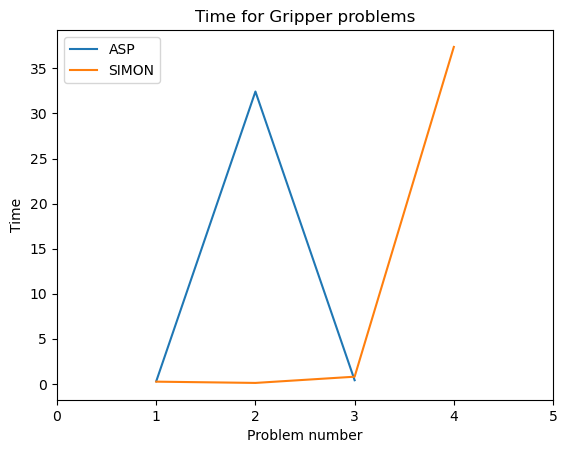

In [20]:
max_value = max(max(values_ASP),max(values_SIMON) )
max_pb = max(len(pb_ASP),len(pb_SIMON))

plt.xlim(0,max_pb+1) 
plt.xlabel("Problem number")

plt.ylabel("Time")
plt.title("Time for Gripper problems")

plt.plot(pb_ASP,values_ASP, label = "ASP")
plt.plot(pb_SIMON,values_SIMON, label = "SIMON")


plt.savefig("graph/time_ASP_SIM_Gripper.png")
plt.legend()
plt.show()
plt.close()


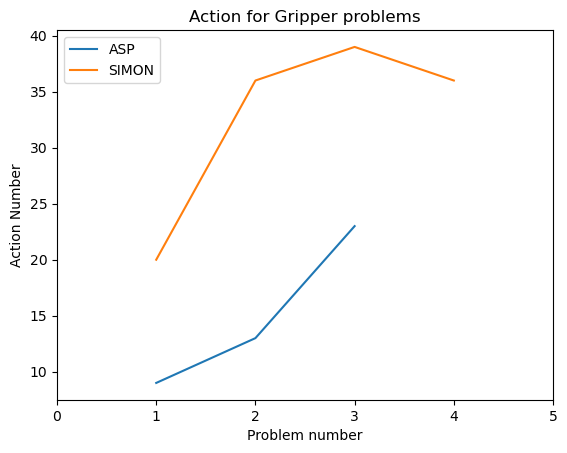

In [21]:
max_value = max(max(action_ASP),max(action_SIMON))
max_pb = max(len(pb_ASP),len(pb_SIMON))

plt.xlim(0,max_pb+1) 
plt.xlabel("Problem number")

plt.ylabel("Action Number")
plt.title("Action for Gripper problems")

plt.plot(pb_ASP,action_ASP, label = "ASP")
plt.plot(pb_SIMON,action_SIMON, label = "SIMON")


plt.savefig("graph/action_ASP_SIM_Gripper.png")
plt.legend()
plt.show()